In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
train = pd.read_csv("titanictrain.csv")
test = pd.read_csv("titanictest.csv")

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train.isnull().sum() ##Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


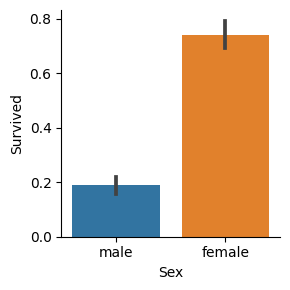

In [40]:
sns.catplot(x="Sex", y ="Survived", data=train, kind="bar", height=3)
plt.show()

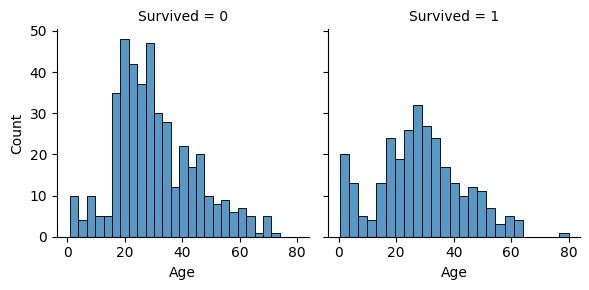

In [41]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

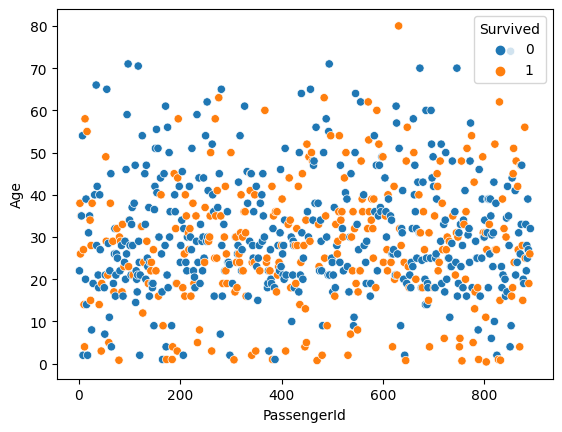

In [42]:
sns.scatterplot(x = train.PassengerId, y = train['Age'], hue = train['Survived'])
plt.show()

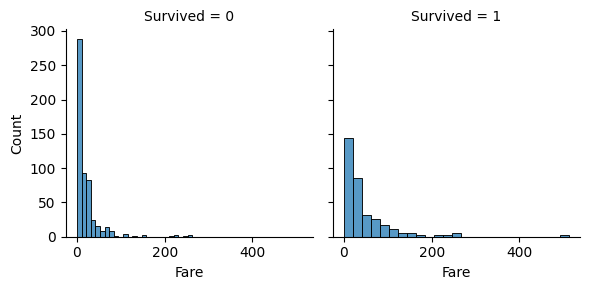

In [43]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

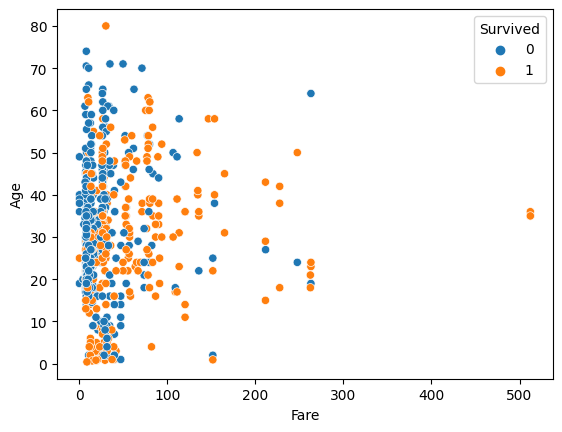

In [44]:
sns.scatterplot(x = train.Fare, y = train['Age'], hue = train['Survived'])
plt.show()

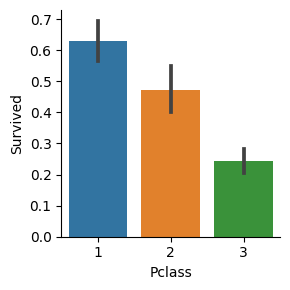

In [45]:
sns.catplot(x="Pclass", y ="Survived", data=train, kind="bar", height=3)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

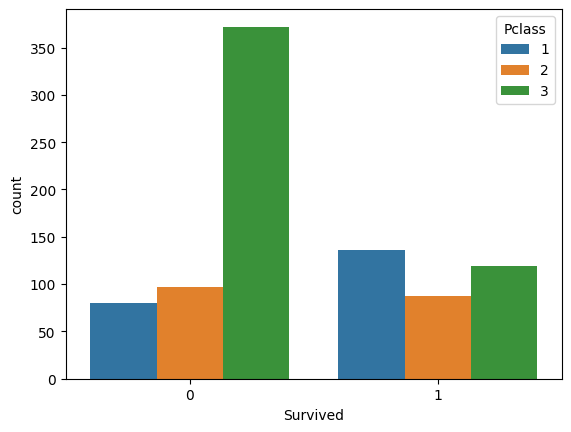

In [46]:
sns.countplot(x='Survived',hue='Pclass',data=train)


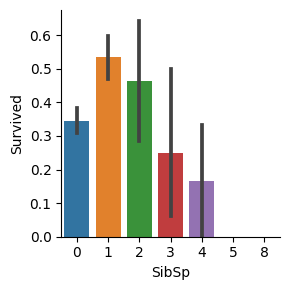

In [47]:
sns.catplot(x="SibSp", y ="Survived", data=train, kind="bar", height=3)
plt.show()

In [48]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])


Survived          
         count      mean
Parch                   
0          678  0.343658
1          118  0.550847
2           80  0.500000
3            5  0.600000
4            4  0.000000
5            5  0.200000
6            1  0.000000

In [49]:
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])
#


Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

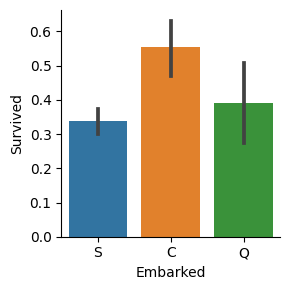

In [50]:
sns.catplot(x="Embarked", y ="Survived", data=train, kind="bar", height=3)
plt.show()

In [51]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')


In [52]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')


In [53]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [54]:
train.Sex.unique()

array([0, 1], dtype=int64)

In [55]:
embark = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)

In [56]:
train.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [57]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [58]:
train[train["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0


In [59]:
#data_train_test = pd.concat([train.assign(ind="train"), test.assign(ind="test")])
data_train_test = pd.concat([train.assign(ind="train"), test.assign(ind="test")])


In [60]:
title_age_means = data_train_test.groupby('Title')['Age'].mean()
for title, mean_age in title_age_means.items():
    data_train_test.loc[(data_train_test['Age'].isna()) & (data_train_test['Title'] == title), 'Age'] = mean_age
data_train_test['Age'] = data_train_test['Age'].fillna(data_train_test['Age'].mean())

KeyError: 'Title'

In [61]:
train = data_train_test[data_train_test["ind"] == "train"].drop(["Ticket", "Cabin", "ind"], axis=1)
test = data_train_test[data_train_test["ind"] == "test"].drop(["Ticket", "Cabin", "ind"], axis=1)

In [62]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,8,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,13,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,7,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,7,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7,2.0
...,...,...,...,...,...,...,...,...,...,...
859,860,0.0,3,"Razi, Mr. Raihed",0,NaN,0,0,7,1.0
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,69,0.0
868,869,0.0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,9,0.0
878,879,0.0,3,"Laleff, Mr. Kristo",0,NaN,0,0,7,0.0


In [63]:
for dataset in [train, test]:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [64]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [65]:
train.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)
test.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)

KeyError: "['Ticket' 'Cabin' 'ind'] not found in axis"

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,0.0


In [67]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

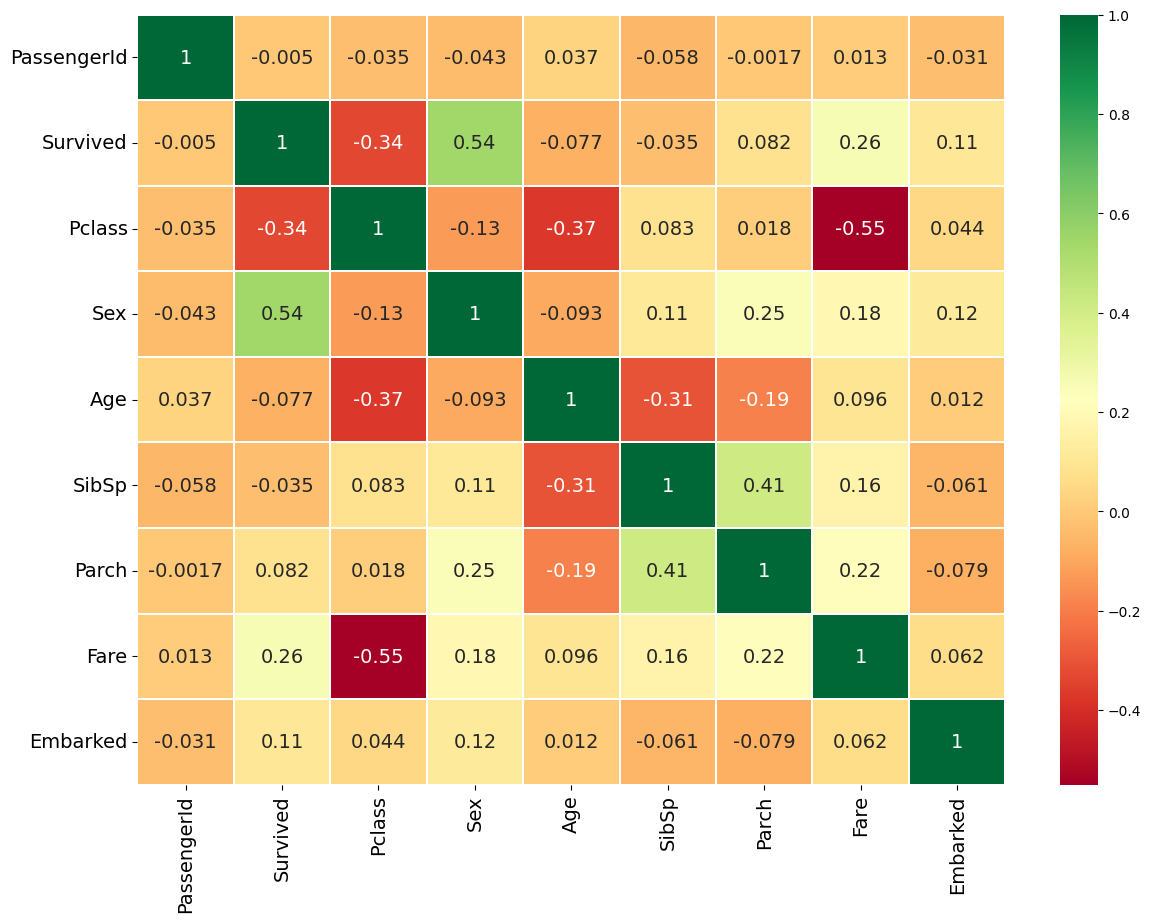

In [68]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Creating New feature

In [70]:
data = [train, test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,0.0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,0.0,1


In [72]:
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = False).agg(['count','sum', 'mean'])

Survived                 
              count    sum      mean
FamilySize                          
1               537  163.0  0.303538
2               161   89.0  0.552795
3               102   59.0  0.578431
4                29   21.0  0.724138
5                15    3.0  0.200000
6                22    3.0  0.136364
7                12    4.0  0.333333
8                 6    0.0  0.000000
11                7    0.0  0.000000

In [73]:
data = [train, test]
for dataset in data:
    dataset['Age*Fare'] = dataset.Age * dataset.Fare

In [74]:
train.loc[:, ['Age*Fare', 'Age', 'Fare']].head(10)

,Age*Fare,Age,Fare
0,154.0,22.0,7
1,2698.0,38.0,71
2,182.0,26.0,7
3,1855.0,35.0,53
4,280.0,35.0,8
5,NaN,NaN,8
6,2754.0,54.0,51
7,42.0,2.0,21
8,297.0,27.0,11
9,420.0,14.0,30


In [79]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train = train.drop(['Name'], axis=1)  
test = test.drop(['Name'], axis=1) 

AttributeError: 'DataFrame' object has no attribute 'Name'

In [80]:
data = [train, test]
for dataset in data:
    dataset['Fare'] = pd.qcut(dataset['Fare'], 13, labels=np.arange(13) + 1)

ValueError: Bin edges must be unique: array([  0.,   7.,   7.,   7.,   8.,  10.,  13.,  15.,  24.,  26.,  33.,
        55.,  83., 512.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [81]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age*Fare,Title
0,1,0.0,3,0,22.0,1,0,7,0.0,2,154.0,1
1,2,1.0,1,1,38.0,1,0,71,1.0,2,2698.0,3
2,3,1.0,3,1,26.0,0,0,7,0.0,1,182.0,2
3,4,1.0,1,1,35.0,1,0,53,0.0,2,1855.0,3
4,5,0.0,3,0,35.0,0,0,8,0.0,1,280.0,1


In [82]:
train.Fare.unique()

array([  7,  71,  53,   8,  51,  21,  11,  30,  16,  26,  31,  29,  13,
        18,  35, 263,  27, 146,  10,  82,  52,   9,  41,  15,  17,  39,
        76,  61,  46,  80,  83,  73,  14,  56,  12,  47,  34,  20,  63,
        23,  77,  24, 247,  22,   6,  79,  36,  66,  69,  55,  25,  33,
        28,   0,  50, 113,  90,  86, 512, 153, 135,  19,  78,  91, 151,
       110, 108, 262, 164, 134,  57, 133,  75, 211,   4, 227, 120,  32,
        81,  89,  38,  49,  59,  93, 221, 106,  40,  42,  65,  37,   5])

In [84]:
!pip install sweetviz

   ---------------------------------------- 15.1/15.1 MB 4.9 MB/s eta 0:00:00


In [85]:
import sweetviz as sv

In [88]:
train = pd.read_csv("titanictrain.csv")
test = pd.read_csv("titanictest.csv")

In [89]:
#analyzing the dataset
analysis = sv.analyze(train)

                                             |                                             | [  0%]   00:00 ->…

In [90]:
#display the report
analysis.show_html('Titanic_train_data_analysis.html', layout = 'widescreen', scale=0.7)

Report Titanic_train_data_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [91]:
#analyzing the dataset
analysis = sv.analyze(train, "Survived")
#display the report
analysis.show_html('Titanic_train_data_analysis.html', layout = 'widescreen', scale=0.7)

                                             |                                             | [  0%]   00:00 ->…

Report Titanic_train_data_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [92]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [93]:
comparison = sv.compare(survived, not_survived)
comparison.show_html('comparison.html', layout = 'widescreen', scale=0.7)

                                             |                                             | [  0%]   00:00 ->…

Report comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [94]:
male = train[train['Sex'] == 'male']
female = train[train['Sex'] == 'female']
comparison = sv.compare([male, " Male"], [female, "Female"])
comparison.show_html('comparison.html', layout = 'widescreen', scale=0.7)

                                             |                                             | [  0%]   00:00 ->…

Report comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [96]:
comparison = sv.compare(train, test)
comparison.show_html('comparison.html')

                                             |                                             | [  0%]   00:00 ->…

Report comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
